# 0.0 - Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree as tr
from sklearn import metrics as mt

/home/aderaldo/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1.0 - Load Dataset

In [ ]:
# path
'/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/classificação/X_training.csv'

## 1.1 - Train Dataset

In [2]:
df1 = pd.read_csv('/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/classificação/X_training.csv')

In [3]:
df2 = pd.read_csv('/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/classificação/y_training.csv')

## 1.2 - Test Dataset

In [4]:
df3 = pd.read_csv('/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/classificação/X_test.csv')

In [5]:
df4 = pd.read_csv('/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/classificação/y_test.csv')

## 1.3 - Validation Dataset

In [6]:
df5 = pd.read_csv('/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/classificação/X_validation.csv')

In [7]:
df6 = pd.read_csv('/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/classificação/y_validation.csv')

In [11]:
df1.shape

(72515, 25)

## 1.4 - Feature Selection

In [8]:
features = ['customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']

In [9]:
x_train = df1.loc[:, features]

In [10]:
y_train = df2.copy()

In [11]:
x_test = df3.loc[:, features]

In [12]:
y_test = df4.copy()

In [13]:
x_val = df5.loc[:, features]

In [14]:
y_val = df6.copy()

# 2.0 - Training

## 2.1 - Fine Tunnig

In [15]:
depth_values = np.arange(2, 30, 2)
accuracy_values = []

for i in depth_values:
    print( "valor de max_depth: {}".format( i ) )
    model_tree = tr.DecisionTreeClassifier( max_depth = i)
    model_tree.fit( x_train, y_train )
    y_pred = model_tree.predict( x_val )
    accuracy = mt.accuracy_score( y_val, y_pred)
    print( "Valor da acurácia: {} \n".format( accuracy ) )
    accuracy_values.append( accuracy )

valor de max_depth: 2
Valor da acurácia: 0.8564947392129734 

valor de max_depth: 4
Valor da acurácia: 0.8934650407027254 

valor de max_depth: 6
Valor da acurácia: 0.9217478039833972 

valor de max_depth: 8
Valor da acurácia: 0.9361626821969818 

valor de max_depth: 10
Valor da acurácia: 0.9429518324270407 

valor de max_depth: 12
Valor da acurácia: 0.9494835741175713 

valor de max_depth: 14
Valor da acurácia: 0.9506740886128897 

valor de max_depth: 16
Valor da acurácia: 0.950030567264069 

valor de max_depth: 18
Valor da acurácia: 0.94912963737572 

valor de max_depth: 20
Valor da acurácia: 0.9481965314199299 

valor de max_depth: 22
Valor da acurácia: 0.9458798545641751 

valor de max_depth: 24
Valor da acurácia: 0.9460729109688214 

valor de max_depth: 26
Valor da acurácia: 0.9441745229898002 

valor de max_depth: 28
Valor da acurácia: 0.9452685092827955 



In [16]:
depth_accuracy = { 'max_depth': depth_values, 'accuracy': accuracy_values}
depth_accuracy_dataframe = pd.DataFrame(depth_accuracy)

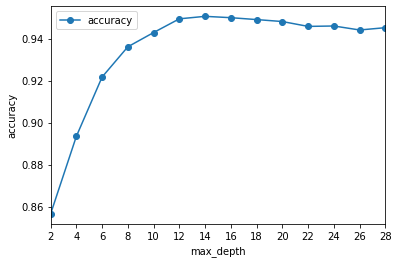

In [22]:
fig, ax = plt.subplots()
depth_accuracy_dataframe.plot(x="max_depth", y="accuracy", marker="o", ax=ax)
plt.xlabel("max_depth")
plt.ylabel("accuracy")
ax.set_xlim(2,28)
ax.set_xticks(np.arange(2, 30, 2));

## 2.2 Houldout Validation

In [26]:
# Define
model = tr.DecisionTreeClassifier(max_depth = 14)
# fit
model.fit ( np.concatenate( ( x_train, x_val) ) , np.concatenate( ( y_train, y_val ) ) )
# predict
y_pred_final = model.predict( x_test )
# performance
mt.accuracy_score( y_test, y_pred_final )

/home/aderaldo/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.9562043795620438

In [27]:
mt.precision_score( y_test, y_pred_final )

0.9618961625282167

In [28]:
mt.recall_score( y_test, y_pred_final )

0.9373515178178619

In [30]:
mt.f1_score( y_test, y_pred_final )

0.9494652406417113

# 3.0 - Metrics

In [33]:
y_pred_test = model.predict_proba( x_test )
y_pred_test = y_pred_test[:, 1]

/home/aderaldo/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


## 3.2 - ROC curve

In [ ]:
# Como não existe uma prefência entres as classe, utilizarei a roc curve para avaliar
# a recall e precisão.

In [34]:
fpr, tpr, thresholds = mt.roc_curve( y_test, y_pred_test)

Text(0, 0.5, 'Tpr')

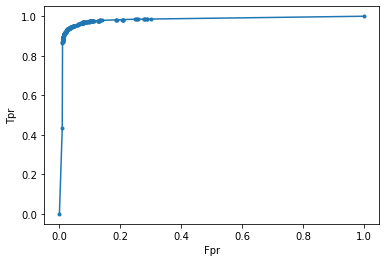

In [35]:
plt.plot(fpr, tpr, marker = '.')
plt.xlabel('Fpr')
plt.ylabel('Tpr')

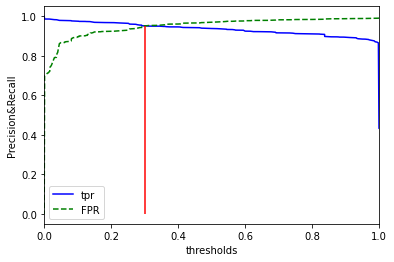

In [41]:
plt.plot( thresholds, tpr, 'b-', label = 'tpr' )
plt.plot( thresholds, 1-fpr, 'g--', label = 'FPR' )
# Esse -1 é pra inverter o gráfico
plt.xlim( [0,1])
plt.vlines( 0.3, 0,0.95, color = 'red' )
plt.xlabel("thresholds")
plt.ylabel("Precision&Recall")
plt.legend()

In [42]:
th_roc = 0.3
y_pred_test = [1 if i > th_roc else 0 for i in y_pred_test]